## 1. simple example of sine wave

In [32]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Populating the interactive namespace from numpy and matplotlib



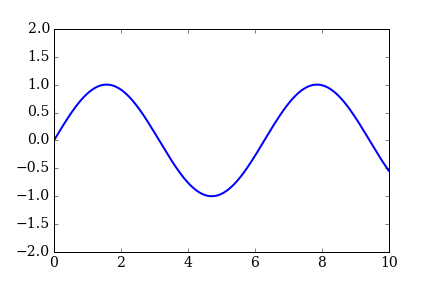
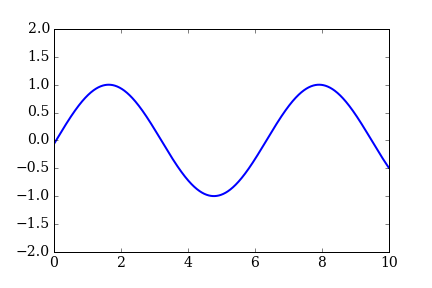
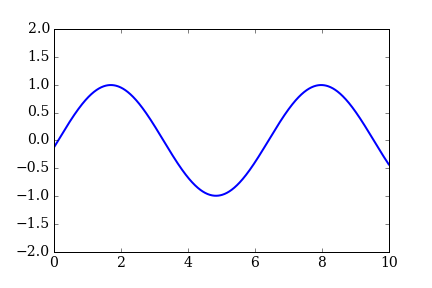
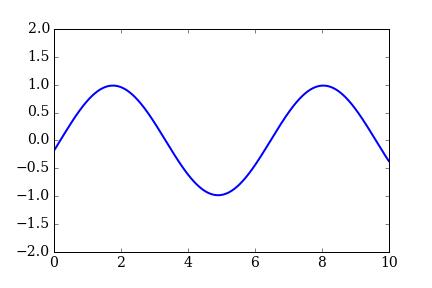
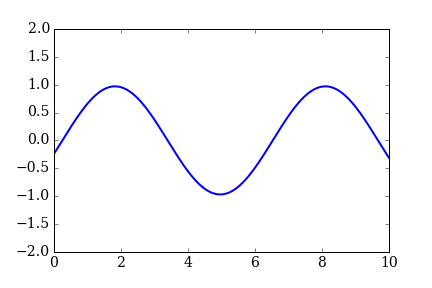
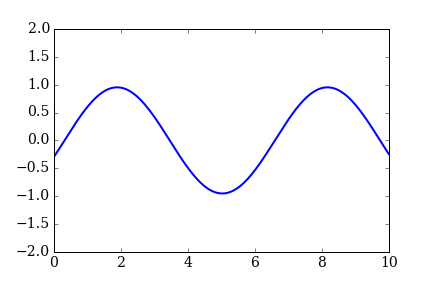
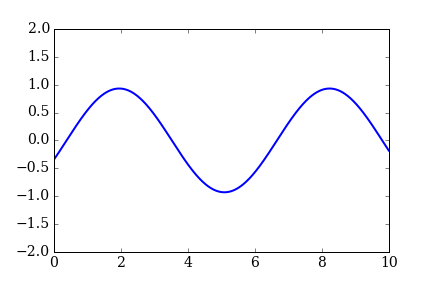
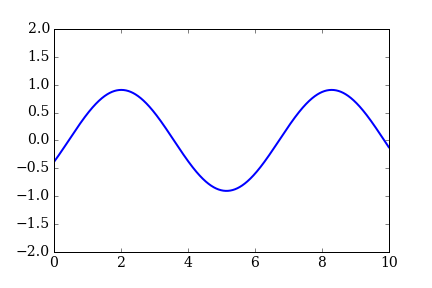
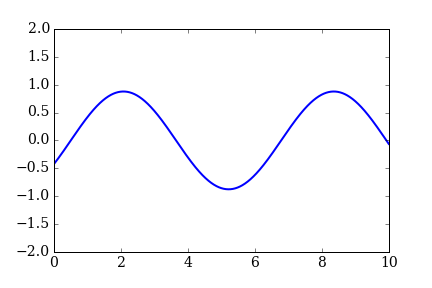
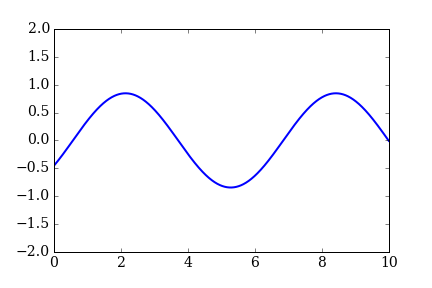
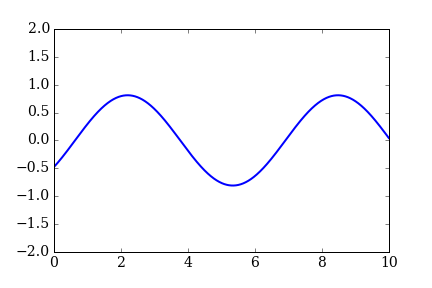
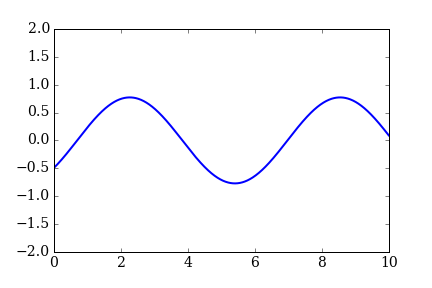
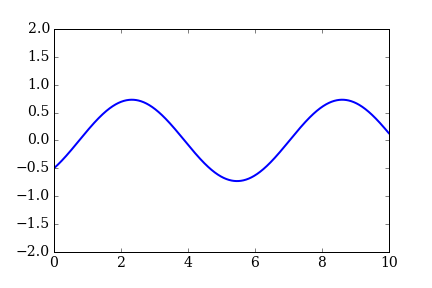
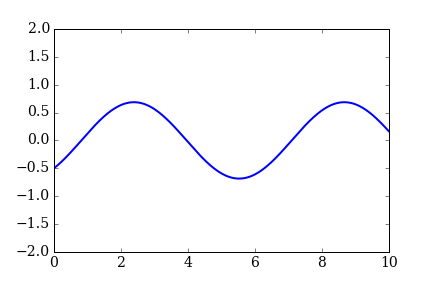
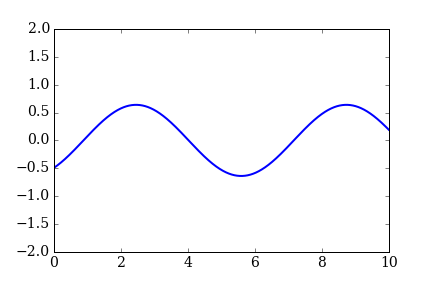
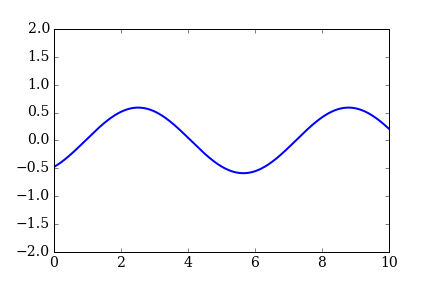
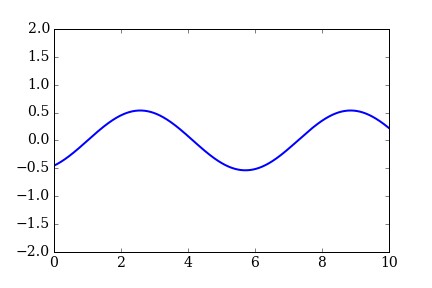
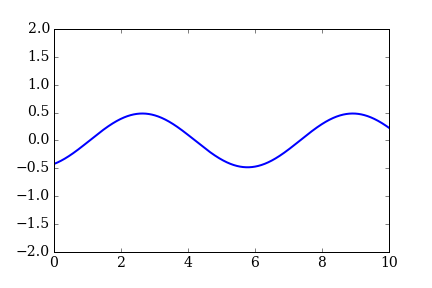
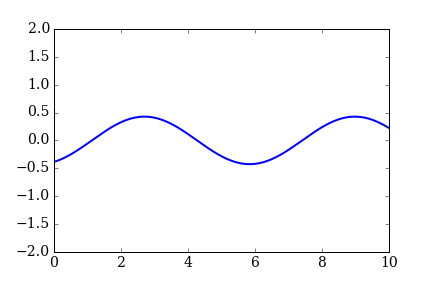
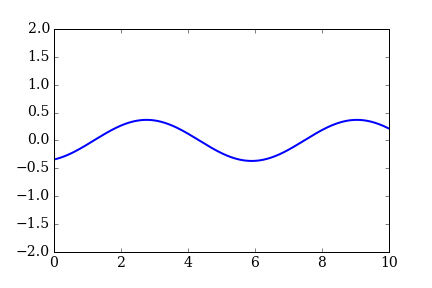
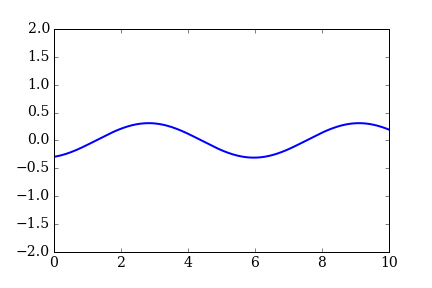
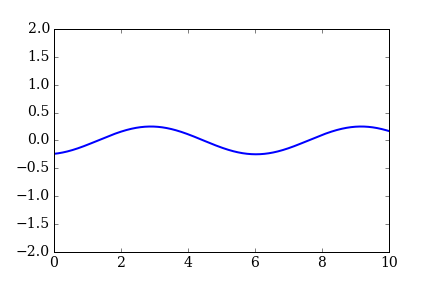
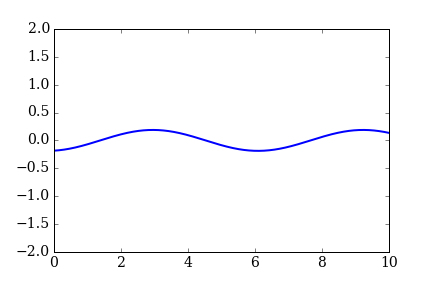
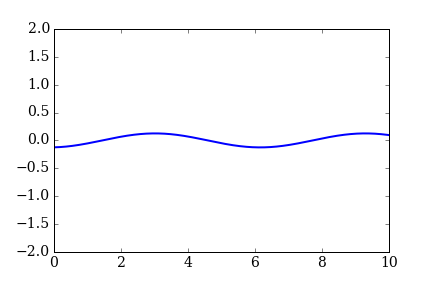
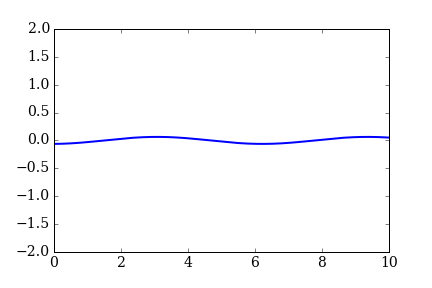
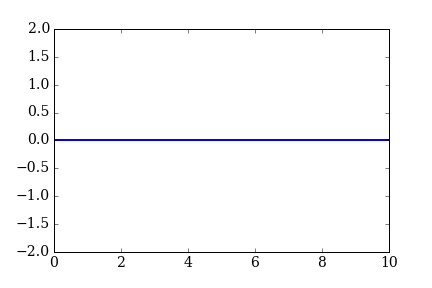
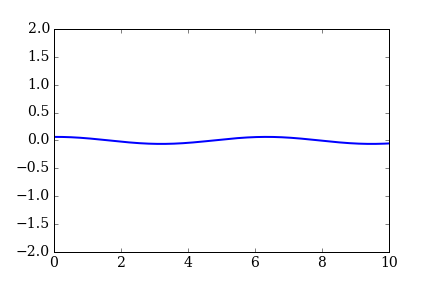
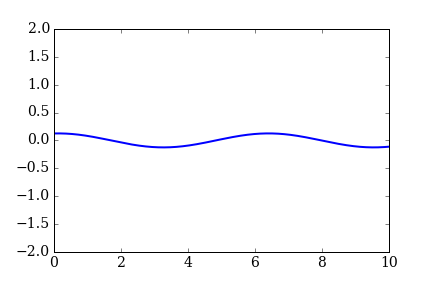
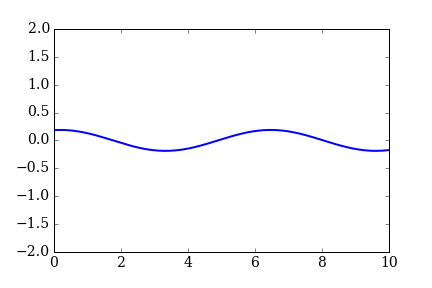
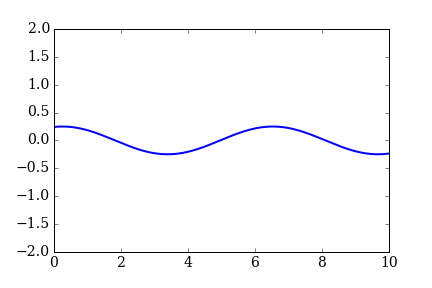
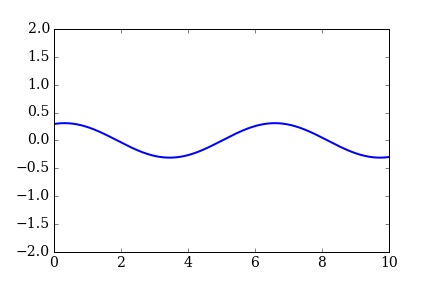
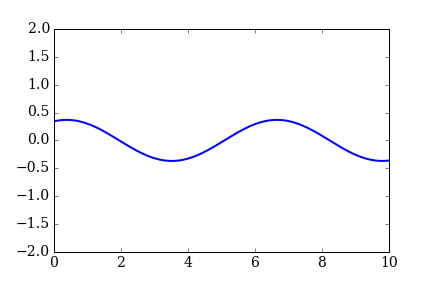
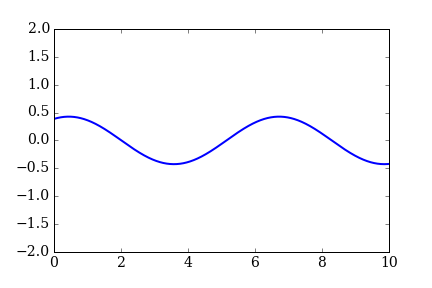
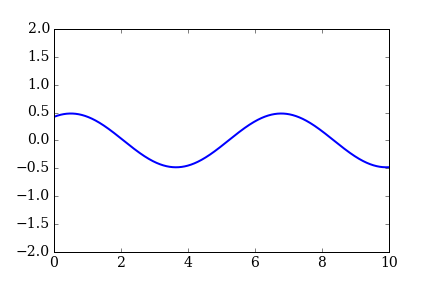
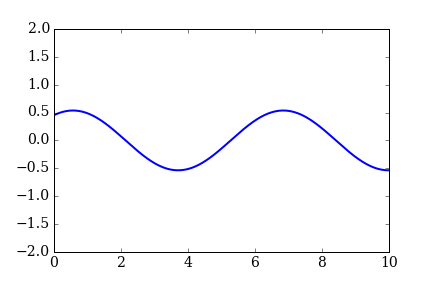
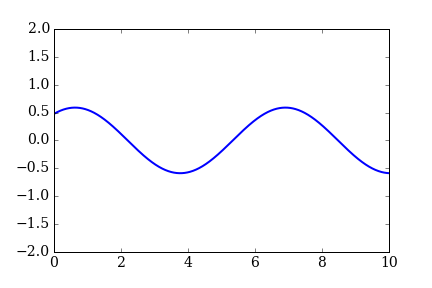
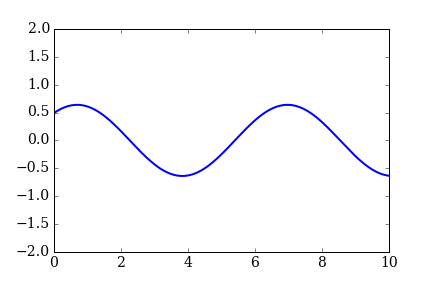
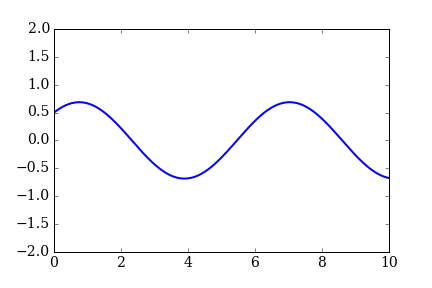
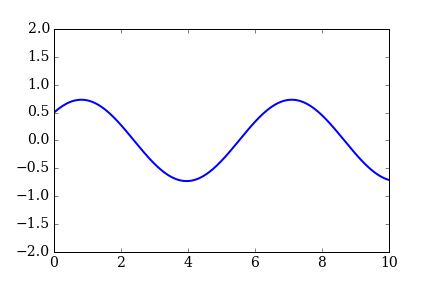
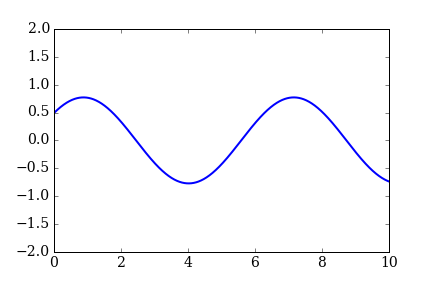
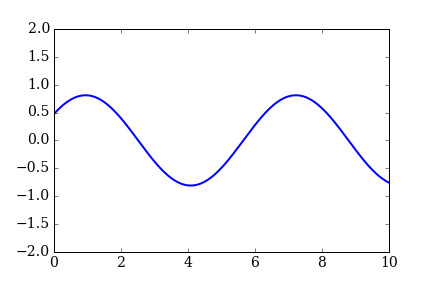
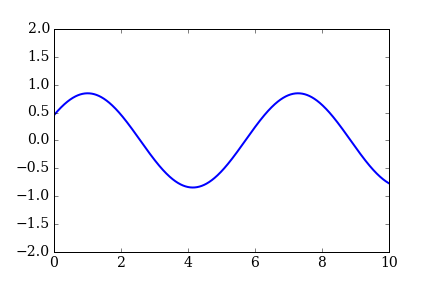
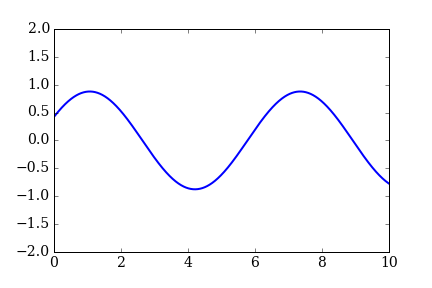
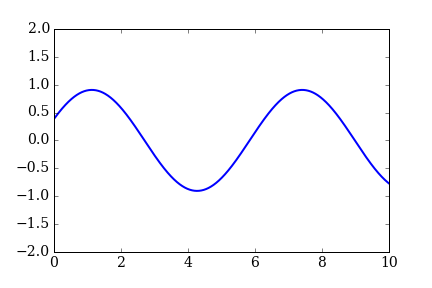
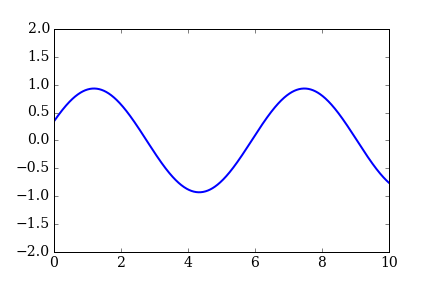
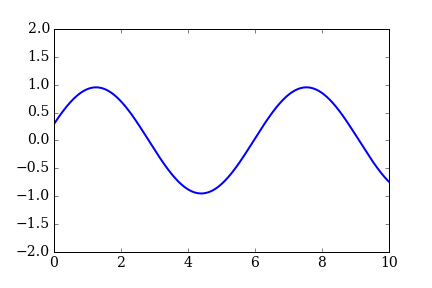
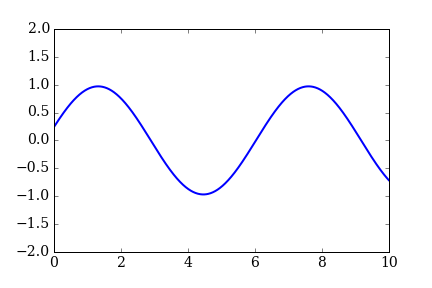
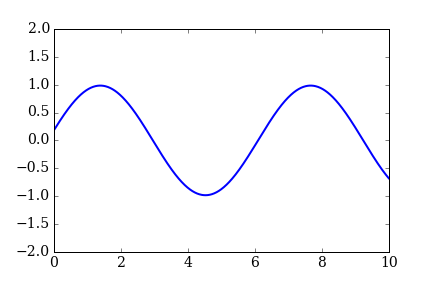
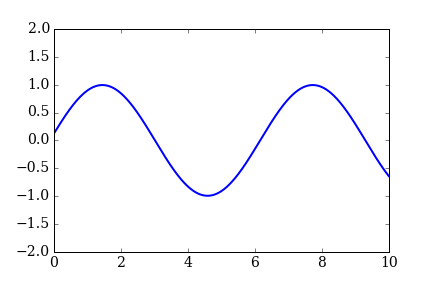
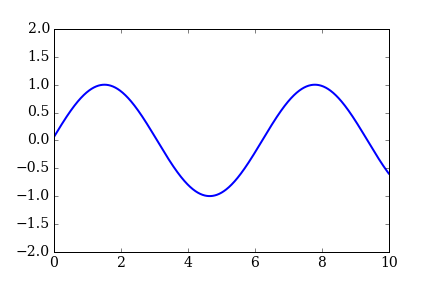
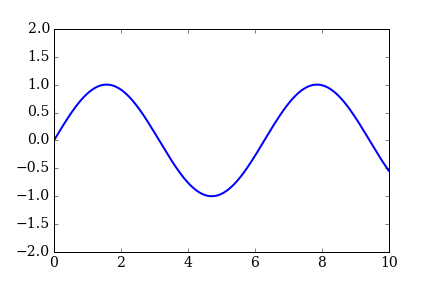
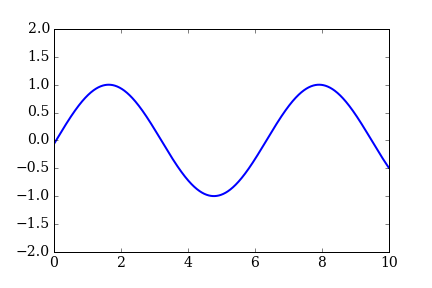
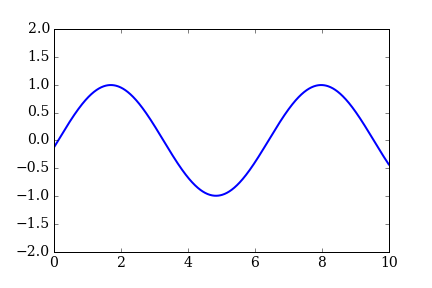
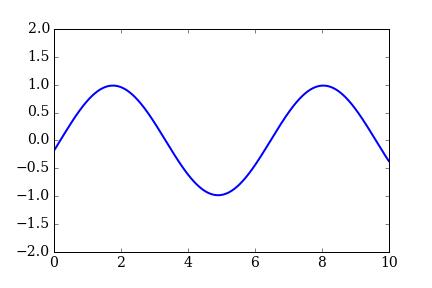
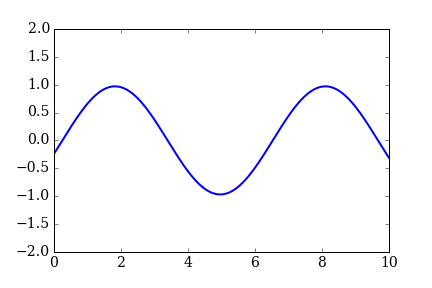
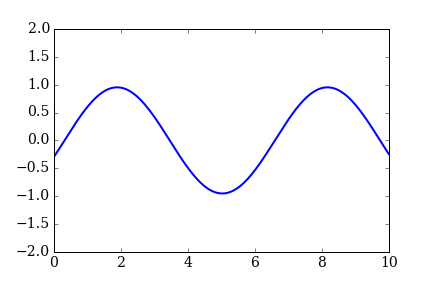
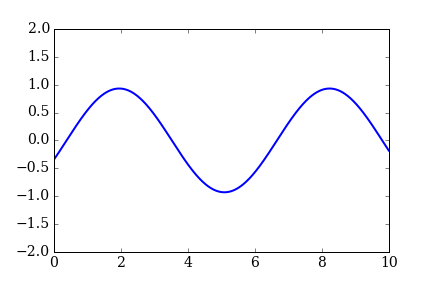
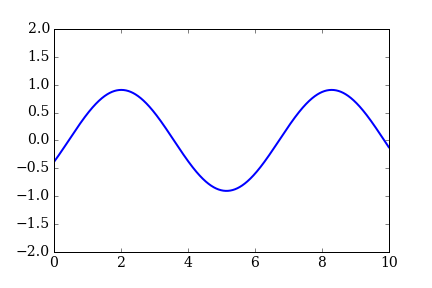
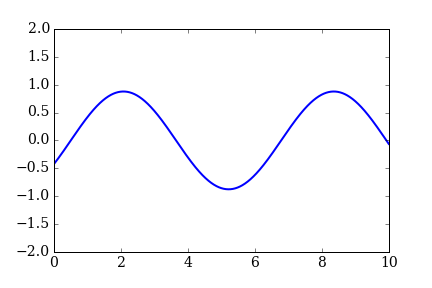
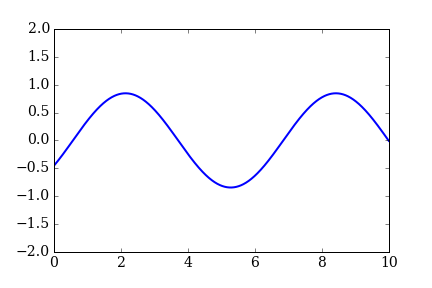
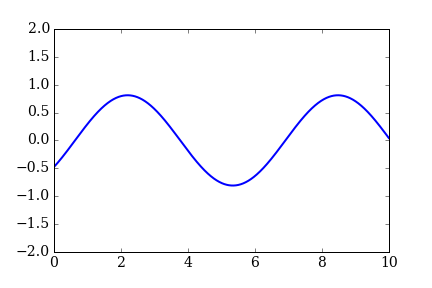
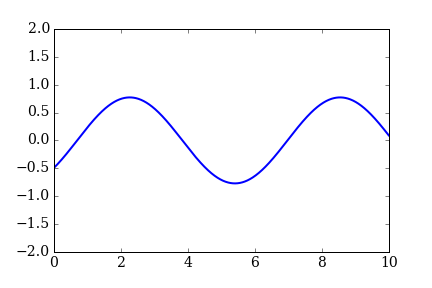
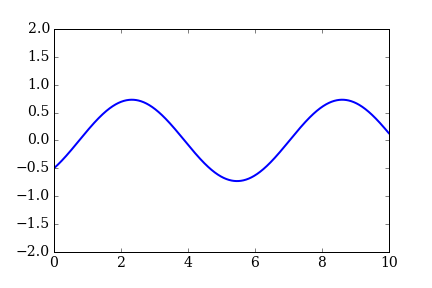
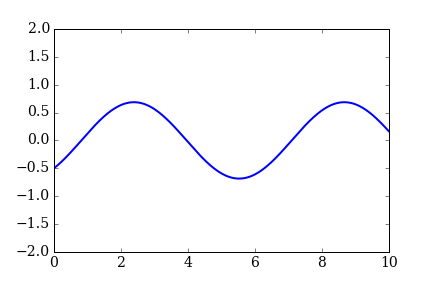
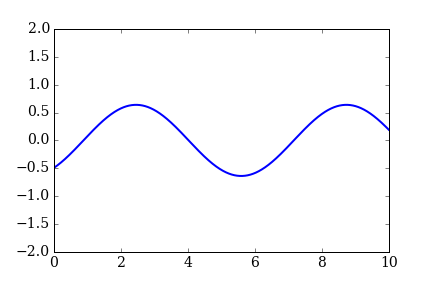
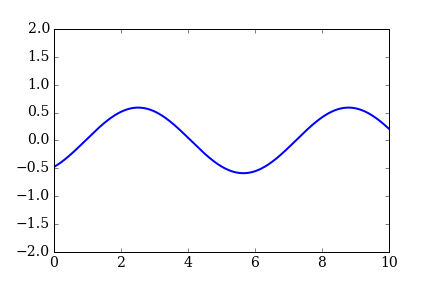
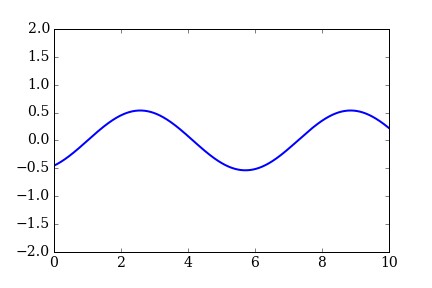
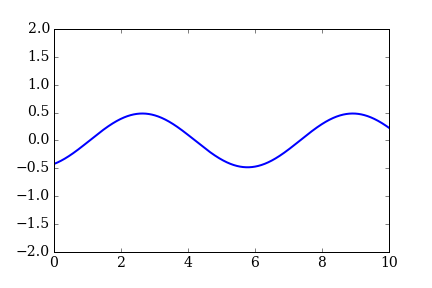
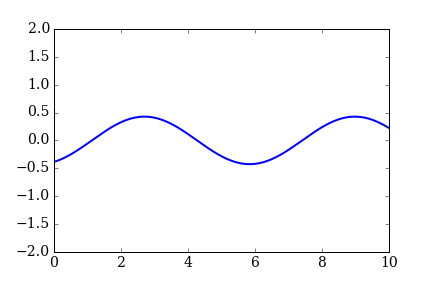
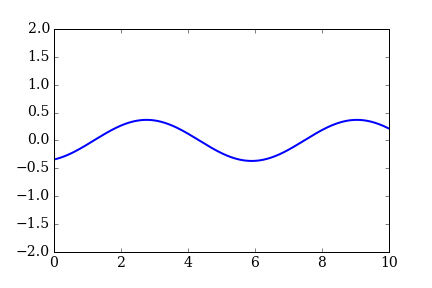
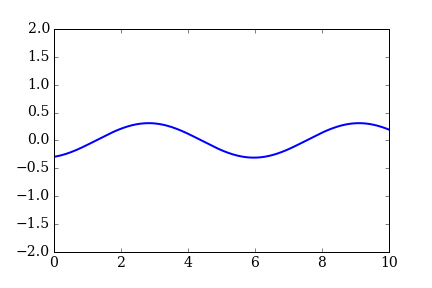
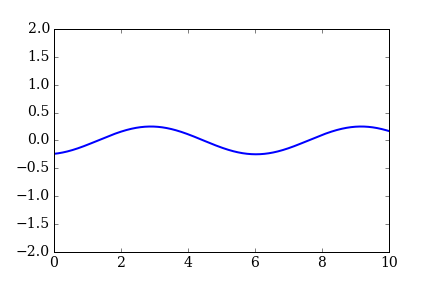
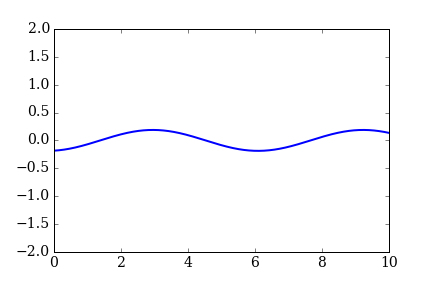
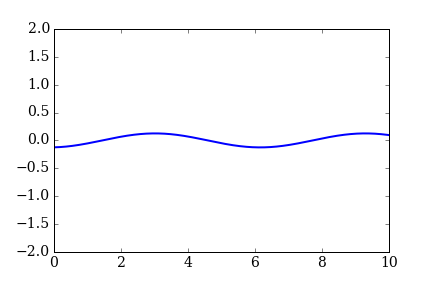
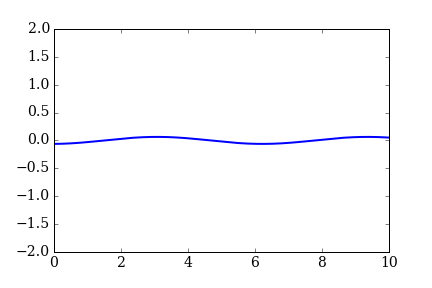
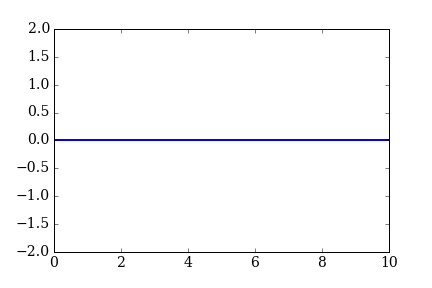
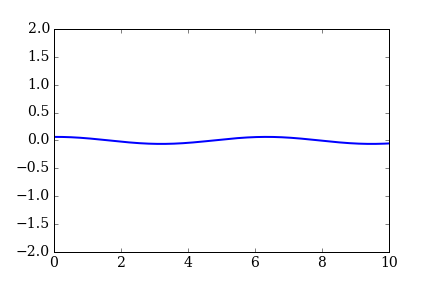
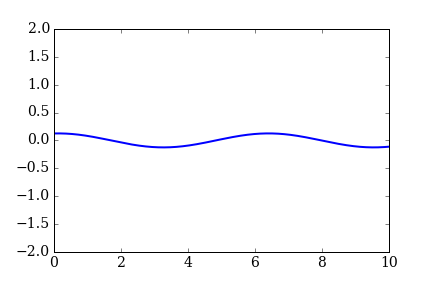
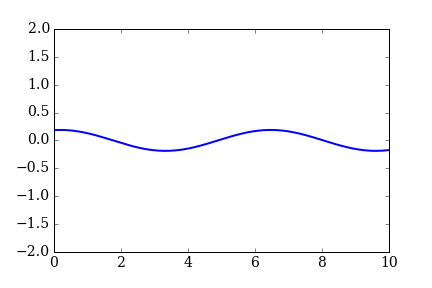
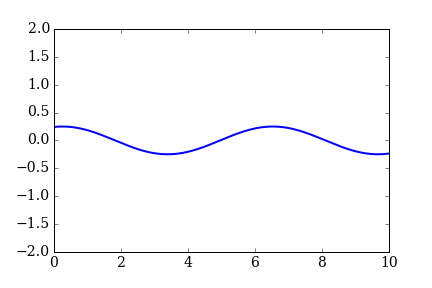
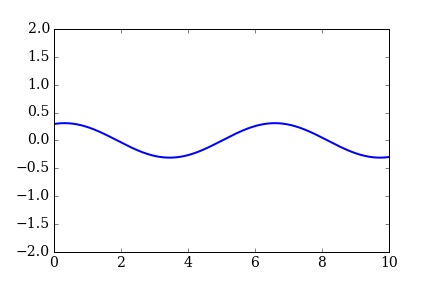
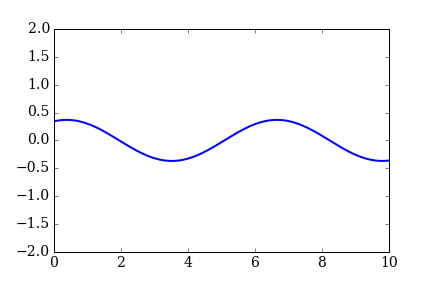
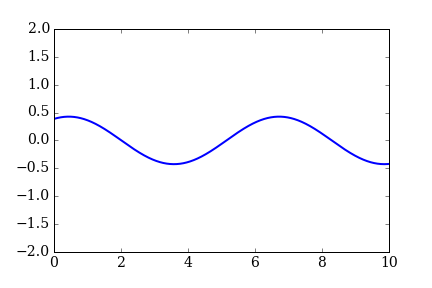
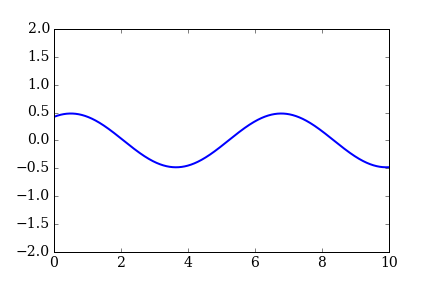
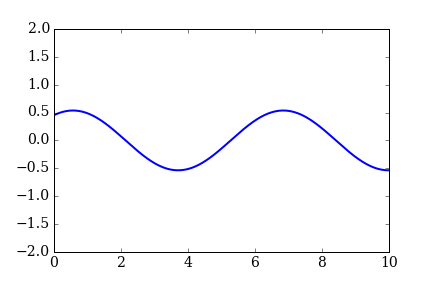
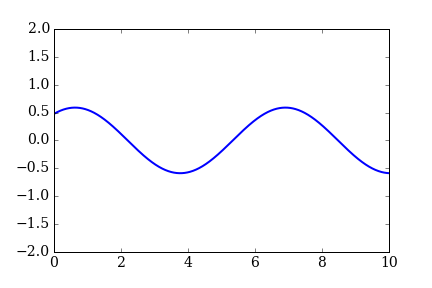
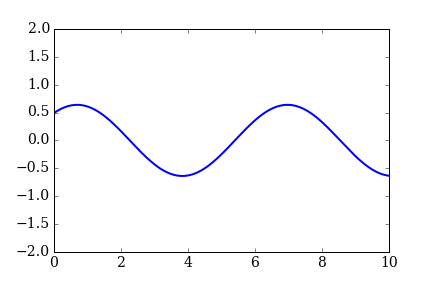
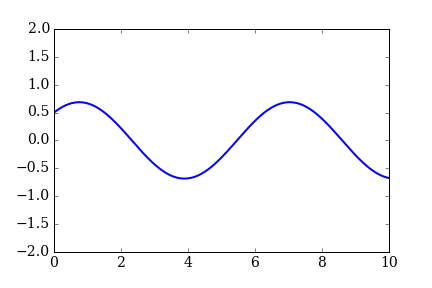
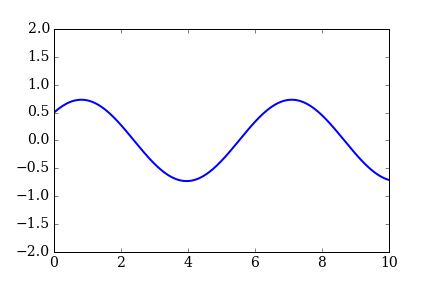
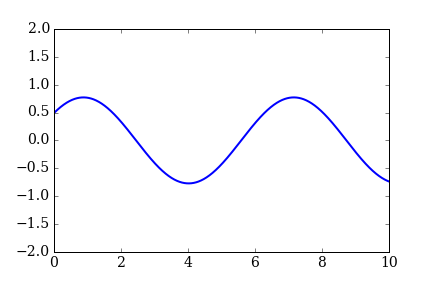
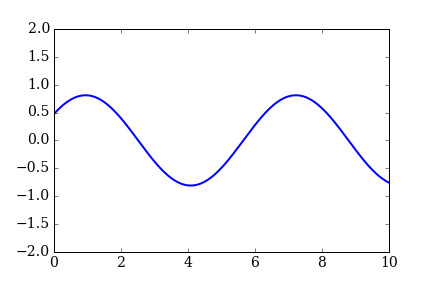
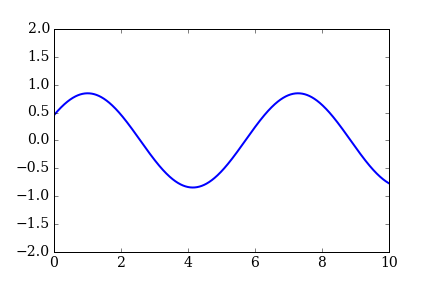
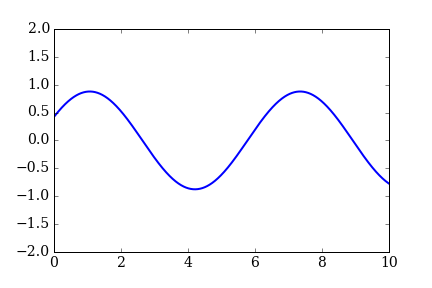
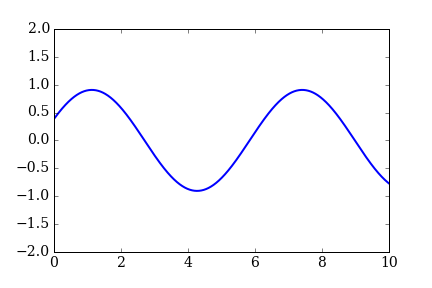
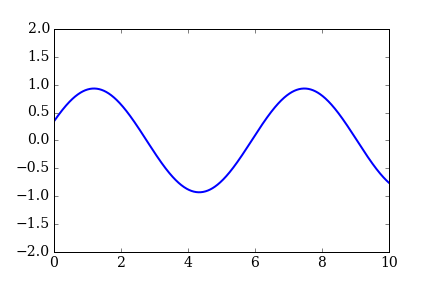
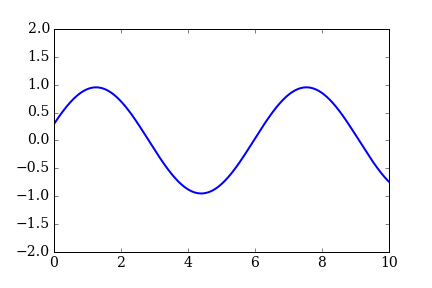
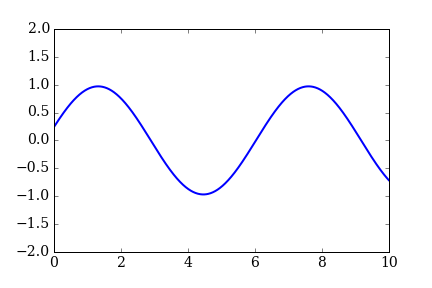
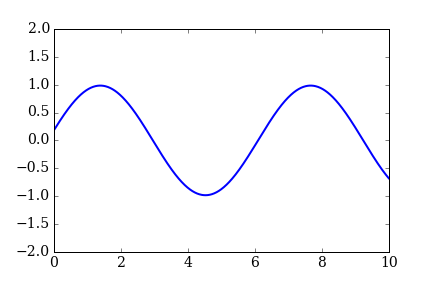
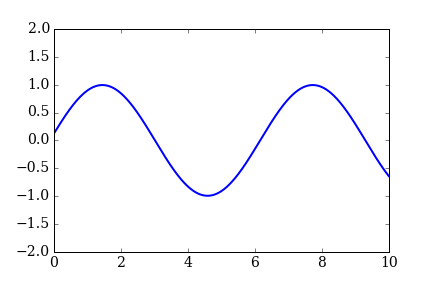
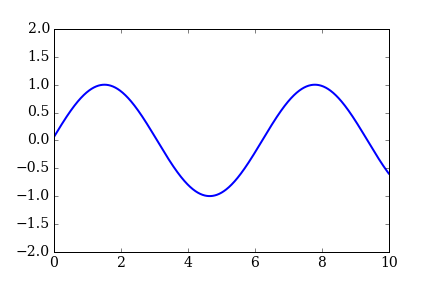

In [31]:
%pylab inline
import numpy as np
from matplotlib import animation
from JSAnimation import IPython_display




fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 10, 1000)
    y = np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi)
    line.set_data(x, y)
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=30)

## 2. random noise images 

0
1
2
3
4
5
6
7
8
9



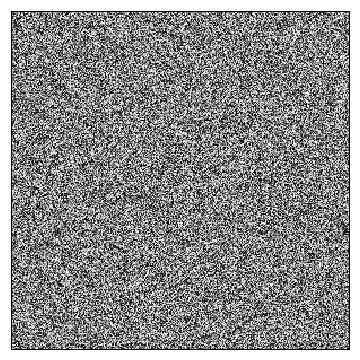
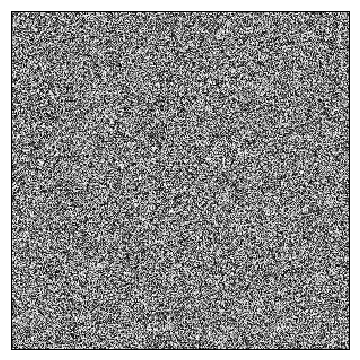
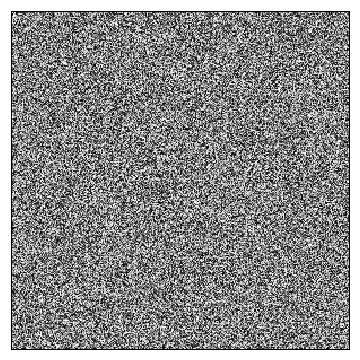
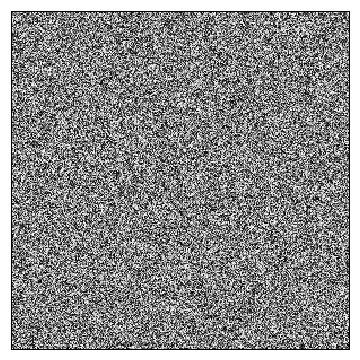
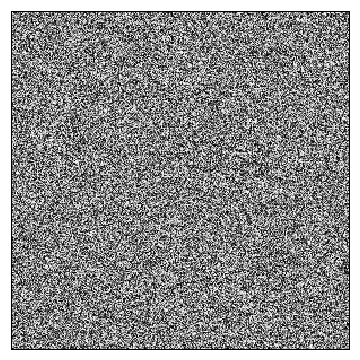
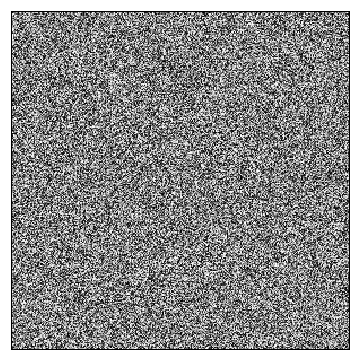
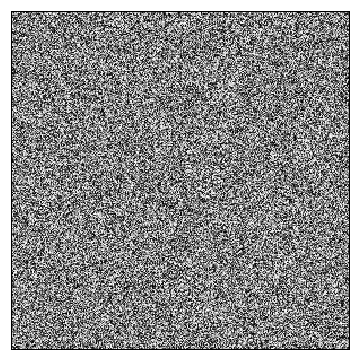
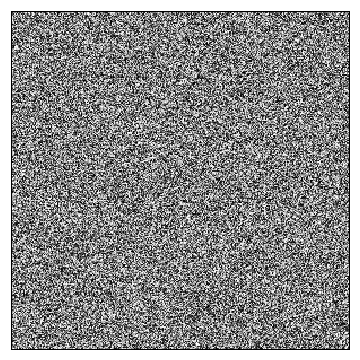
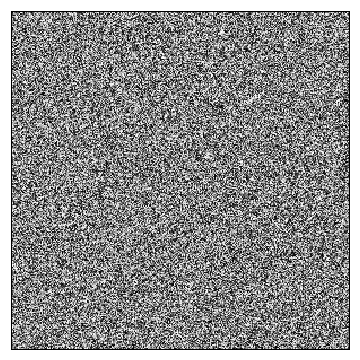
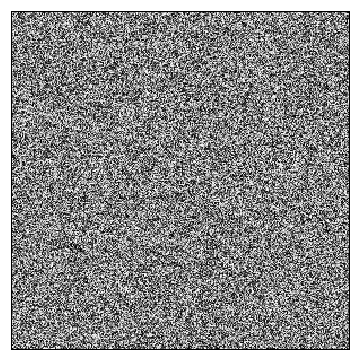

In [39]:
dpi = 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

im = ax.imshow(rand(300,300),cmap='gray',interpolation='nearest')
im.set_clim([0,1])
fig.set_size_inches([5,5])

tight_layout()
  
def init():
    tmp = rand(300,300)
    im.set_data(tmp)
    return im
def animate(i):
    #print i
    tmp = rand(300,300)
    im.set_data(tmp)
    return im

    #legend(loc=0)
animation.FuncAnimation(fig,animate,init_func=init,interval=30,frames=10)
  

## 3. snapshots of 2D MRI of Athena++


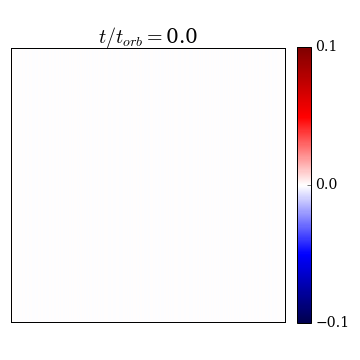
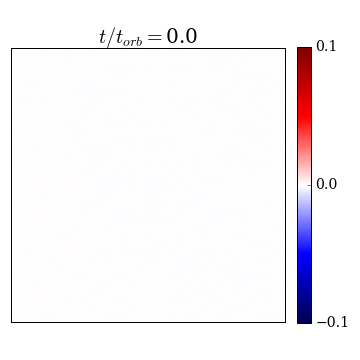
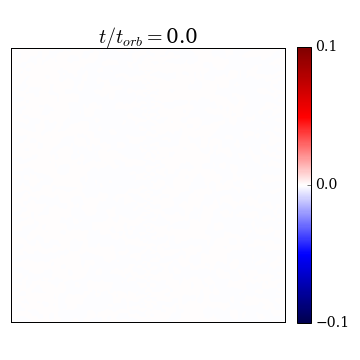
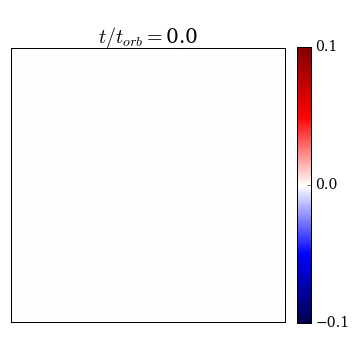
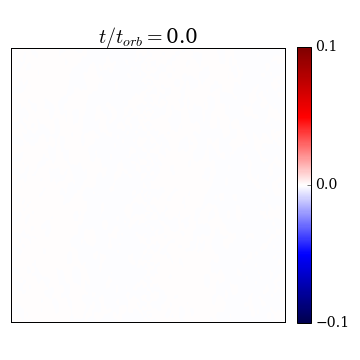
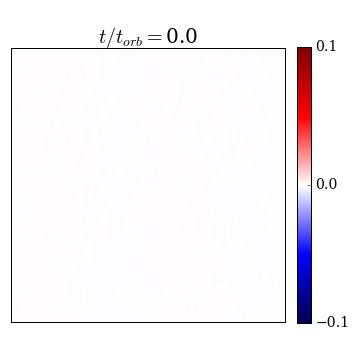
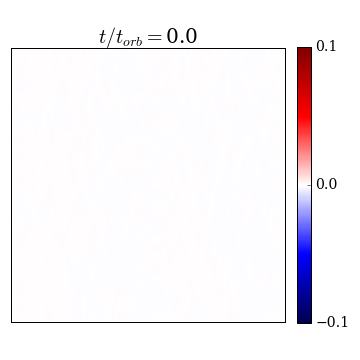
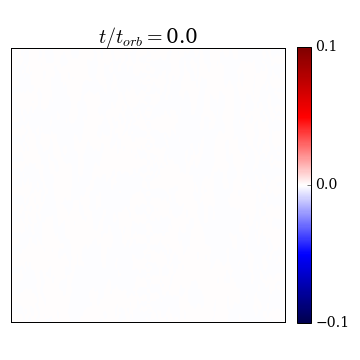
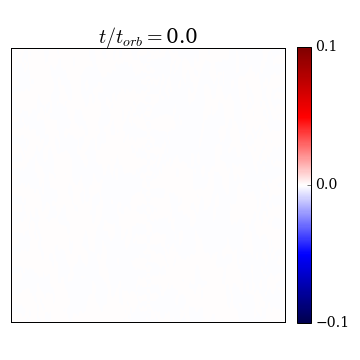
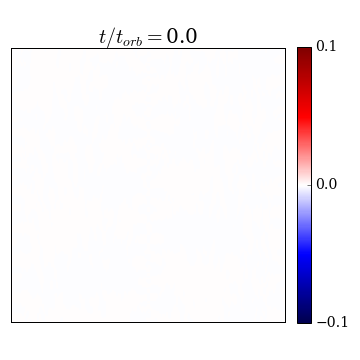

In [62]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib import animation
from JSAnimation import IPython_display
import athena_read as ath
import athena_map as amap
from shwave import cn5

dpi = 100
time = 0.0 # global variable for time (in orbits)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

im = ax.imshow(np.zeros([256,256]),cmap='seismic',interpolation='nearest',origin='lower')
im.set_clim([-0.1,0.1])
cbar = fig.colorbar(im, ticks=[-0.1, 0, 0.1],fraction=0.046,pad=0.04)
title = plt.title(r'$t/t_{orb}=$'+str(time)[0:4],fontsize=20)
#ax.colorbar(fraction=0.046,pad=0.04)
fig.set_size_inches([5,5])


tight_layout()
  
def init():
    tmp = np.zeros([300,300])
    im.set_data(tmp)
    return im
def animate(i):
# read frames i
  def read_athena(i):
    q=1.5; omg=1e-3; torb=np.pi*2./omg; cs=0.00408;probid='HB3'
    targ = '../develop/bin/mri/r256/'
    filename=targ+'/'+probid+'.block0.out2.'+cn5(i)+'.vtk'
    trunk = ath.vtk(filename)
    t = amap.map(trunk,'time',shcoord='xz')/torb
    grid = amap.map(trunk,'grid',shcoord='xz')
    #print grid
    x = amap.rmghost(grid[0]) 
    xb = x[:-1]+(x[1]-x[0])*0.5
    z = amap.rmghost(grid[2]) 
    zb = z[:-1]+(x[1]-x[0])*0.5
    vel = amap.map(trunk,'velocity',shcoord='xz')
    vely = amap.rmghost(vel[:,:,:,2])[0]
    dvely = vely + np.resize(q*omg*xb,[np.size(xb),np.size(zb)])
    dvely /=cs
    return t,dvely
# set frame i
  time, dvely = read_athena(i)
  im.set_data(dvely)
  return im

    #legend(loc=0)
animation.FuncAnimation(fig,animate,init_func=init,interval=30,frames=160)
  